# How well do jobs and skills pay for Data Analysts?

In [1]:
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna(x) else x)

In [ ]:
df_IND = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])
df_IND 


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [ ]:
target_roles = [
    "Data Analyst", "Senior Data Analyst",
    "Data Scientist", "Senior Data Scientist",
    "Data Engineer", "Senior Data Engineer",
]

df_filtered = df_IND[df_IND["job_title_short"].isin(target_roles)]

In [19]:
job_titles = df_filtered['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [83]:
df_top_IND = df_IND[df_IND['job_title_short'].isin(job_titles)]
job_order = ['Data Analyst', 'Senior Data Analyst', 'Data Scientist', 'Senior Data Scientist', 'Data Engineer', 'Senior Data Engineer']
job_order

['Data Analyst',
 'Senior Data Analyst',
 'Data Scientist',
 'Senior Data Scientist',
 'Data Engineer',
 'Senior Data Engineer']

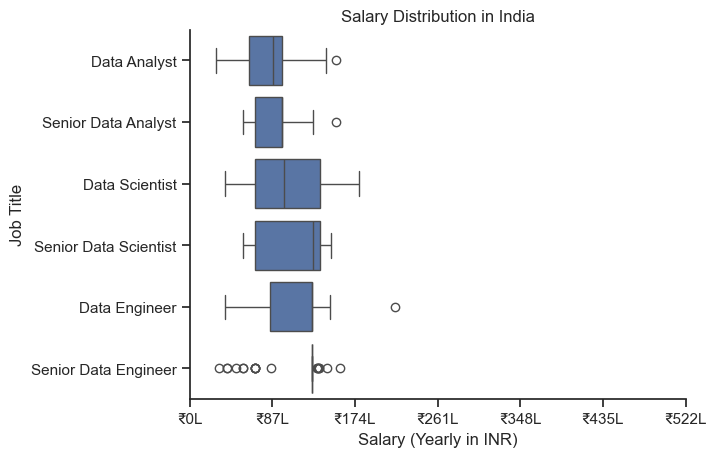

In [84]:
sns.boxplot(data=df_top_IND, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style="ticks")
sns.despine()

plt.title('Salary Distribution in India')
plt.xlabel('Salary (Yearly in INR)')
plt.ylabel('Job Title')
plt.xlim(0, 600000)

from matplotlib.ticker import FuncFormatter

def usd_to_inr_lakhs(x, pos):
    return f"₹{int(x * 87/100000)}L"

plt.gca().xaxis.set_major_formatter(FuncFormatter(usd_to_inr_lakhs))

# Investigate Median Salary Vs Skill for Data Analysts

In [86]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

In [87]:
df_DA_IND = df_DA_IND.explode('job_skills')
df_DA_IND[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [96]:
df_DA_top_pay = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [114]:
df_DA_top_skills = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_top_skills = df_DA_top_skills.head(10).sort_values(by='median', ascending=False)
df_DA_top_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11328\3976659297.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11328\3976659297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11328\3976659297.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11328\3976659297.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


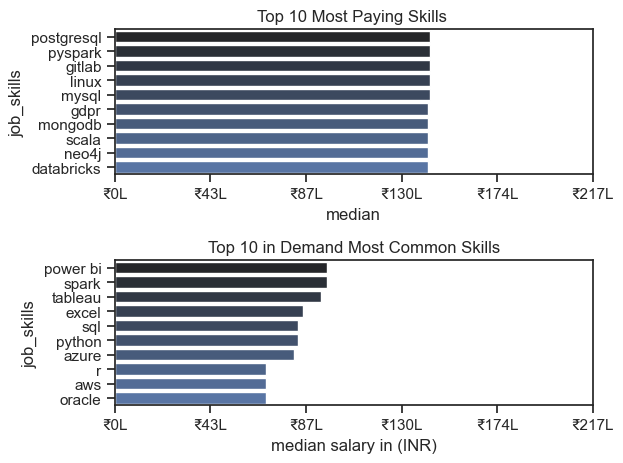

In [116]:
fig , ax = plt.subplots(2,1)
sns.set_theme(style="ticks")
# ...existing code...
sns.barplot(
    data=df_DA_top_pay.reset_index(),
    x='median',
    y='job_skills',
    order=df_DA_top_pay.reset_index().sort_values('median', ascending=False)['job_skills'],
    ax=ax[0],
    palette='dark:b',
    ci=None
)

sns.barplot(
    data=df_DA_top_skills.reset_index(),
    x='median',
    y='job_skills',
    order=df_DA_top_skills.reset_index().sort_values('median', ascending=False)['job_skills'],
    ax=ax[1],
    palette='dark:b',
    ci=None
)

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], title='Top 10 Most Paying Skills ', legend = False)
# df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], title='Top 10 in Demand Most Common Skills', legend = False)

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"₹{int(x * 87/100000)}L"))
ax[0].set_title('Top 10 Most Paying Skills ')
ax[0].set_xlim(0, 250000)
ax[1].set_title('Top 10 in Demand Most Common Skills')
ax[1].set_xlim(0, 250000)


ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"₹{int(x * 87/100000)}L"))
plt.tight_layout()
plt.xlabel('median salary in (INR)')
plt.show()